In [23]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from tensorflow import keras


# Load MNIST Data

The MNIST dataset consists of 70,000 28x28 images of handwritten digits extracted from two NIST databases.

The MNIST dataset consists of 70,000 28x28 black-and-white images of handwritten digits extracted from two NIST databases. There are 60,000 images in the training dataset and 10,000 images in the validation dataset, one class per digit so a total of 10 classes, with 7,000 images (6,000 train images and 1,000 test images) per class. Half of the image were drawn by Census Bureau employees and the other half by high school students (this split is evenly distributed in the training and testing sets).


In [24]:
#load dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #train-test 0.75-0.25 split

# Explore Data

In [25]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


5


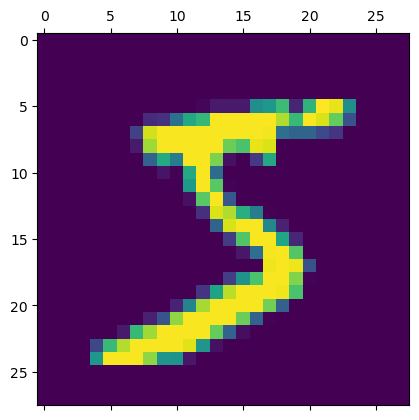

In [26]:
#plot image 

plt.matshow(x_train[0])

#print y_train

print(y_train[0])

In [27]:
#print x_train
# 28X28 grid

print(x_train[0].shape)
print(x_train[0])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

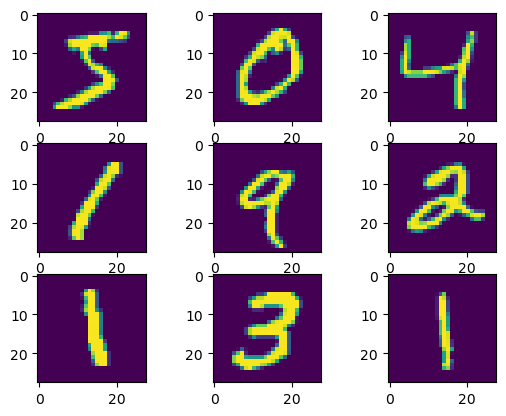

In [28]:
# plot first few images

for i in range(9):
    
    # define subplot with 3 rows and 3 columns, index from 1 to 9
    plt.subplot(3,3,i+1)
    
    # plot pixel data
    plt.imshow(x_train[i])
    
# show the figure
plt.show()

# Prepare Data

### Normalization
Normalization is the process of scaling and centering the features of a dataset. 
The goal of normalization is to bring all features to a similar scale so that they contribute equally to the learning process and no single feature dominates due to its larger magnitude. 

In [29]:
#normalize data by scaling
#we can scale data range (0-255) scaled to 0-1, by dividing by 255

x_train = x_train / 255
x_test = x_test / 255

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

# Flattening

Flattening is the process of converting multi-dimensional data, such as images or tensors, into a one-dimensional vector. 

This is often a necessary step when passing data to a neural network's input layer, which typically expects one-dimensional input.

We are flattenning 28*28 2D input data into one dimensional data with length 784

In [30]:
#flatten 28x28 grids into longitudanal input

print("before flattening, shape of x_train is ", x_train.shape)
print("before flattening, shape of each x_train data is ", x_train[0].shape)

# image_vector_size = 28*28= 784
image_vector_size = 28*28

x_train = x_train.reshape(len(x_train), image_vector_size)
x_test = x_test.reshape(len(x_test), image_vector_size)

print("after flattening, shape of x_train is ", x_train.shape)
print("after flattening, shape of each x_train data is ", x_train[0].shape)

before flattening, shape of x_train is  (60000, 28, 28)
before flattening, shape of each x_train data is  (28, 28)
after flattening, shape of x_train is  (60000, 784)
after flattening, shape of each x_train data is  (784,)


# Define Neural Network Model Architecture

Sequential groups a linear stack of layers into a tf.keras.Model

Dense layers are "fully connected" layers

Sequential Documentation: https://keras.io/models/sequential/

In [31]:
# Define Neural Network model architecture

#define dense sequential neural network with 784 inputs, 10 outputs 
# one hidden layer with 32 neurons and sigmoid activation function

#input size
image_size = 784 # 28*28

#output size
num_classes = 10 # ten unique digits

#define model type as Sequential. Sequential groups a linear stack of layers
model = keras.Sequential()

#define hidden layer: neurons= 32, activation= sigmoid
model.add(keras.layers.Dense(units=32, activation='sigmoid', input_shape=(image_size,))) 

#define output layer: neurons= 10, activation= softmax
model.add(keras.layers.Dense(units=num_classes, activation='softmax')) 


model.summary() #print the model architecture

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


The resulting architecture has 25,450 tunable parameters. 
From the input layer to the hidden layer there are 784*32 = 25,088 weights. 

The hidden layer has 32 nodes so there are 32 biases. 
This brings us to 25,088 + 32 = 25,120 parameters.

From the hidden layer to the output layer there are 32*10 = 320 weights.
Each of the ten nodes adds a single bias bringing us to 25,120 + 320 + 10 = 25,450 total parameters.

## Compile Model

After creating a neural network architecture, the next step is to compile the model before training it on data. 

The compilation step involves configuring the model with specific settings that are necessary for training. 

Optimizer: The optimization algorithm used to update the model parameters during training. Common optimizers include SGD (Stochastic Gradient Descent), Adam, RMSprop.

Loss function: The function used to measure the difference between the model's prediction and the actual target.
The choice of the loss function depends on the nature of the task, such as mean squared error for regression or categorical cross-entropy for classification.

Metrics: These are additional metrics to monitor during training and evaluation. 

In [36]:
#compile the neural network model

#Sparse_categorial_entropy is used as there are multiple labels provided as integers.

model.compile(optimizer="sgd", 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


## Train the model

In [37]:
#track history of training the model

#epochs=50 means the model will iterate over the entire training dataset 50 times.

history= model.fit(x_train, y_train, batch_size=120, epochs=50, validation_split=0.2)


Epoch 1/50
400/400 [==============================] - 1s 2ms/step - loss: 2.1081 - accuracy: 0.3926 - val_loss: 1.9215 - val_accuracy: 0.5936
Epoch 2/50
400/400 [==============================] - 1s 3ms/step - loss: 1.7718 - accuracy: 0.6281 - val_loss: 1.6133 - val_accuracy: 0.6774
Epoch 3/50
400/400 [==============================] - 1s 3ms/step - loss: 1.5030 - accuracy: 0.6838 - val_loss: 1.3709 - val_accuracy: 0.7272
Epoch 4/50
400/400 [==============================] - 1s 2ms/step - loss: 1.2957 - accuracy: 0.7249 - val_loss: 1.1860 - val_accuracy: 0.7718
Epoch 5/50
400/400 [==============================] - 1s 2ms/step - loss: 1.1377 - accuracy: 0.7630 - val_loss: 1.0446 - val_accuracy: 0.8007
Epoch 6/50
400/400 [==============================] - 1s 2ms/step - loss: 1.0157 - accuracy: 0.7914 - val_loss: 0.9347 - val_accuracy: 0.8230
Epoch 7/50
400/400 [==============================] - 1s 3ms/step - loss: 0.9195 - accuracy: 0.8118 - val_loss: 0.8471 - val_accuracy: 0.8403
Epoch 

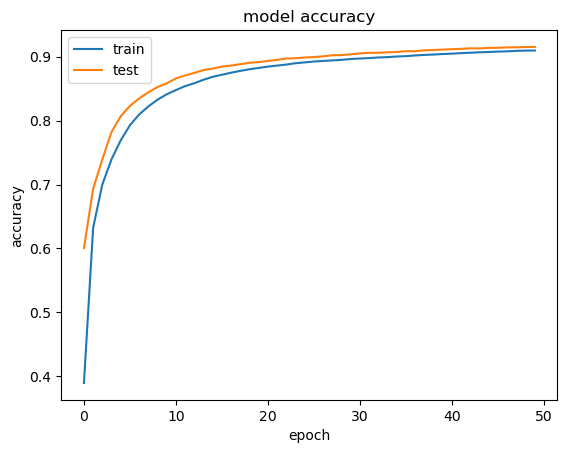

In [12]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Model Evaluation

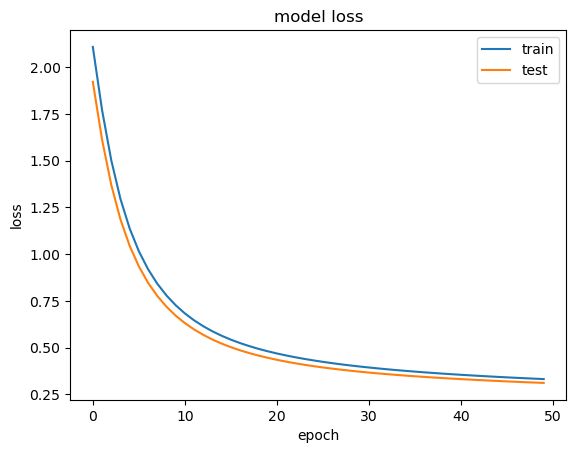

In [38]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [39]:
#Evaluate Model on test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3157 - accuracy: 0.9151


[0.3156723976135254, 0.9150999784469604]

# Predictions

In [40]:
#predictions

y_pred = model.predict(x_test)

313/313 [==============================] - 0s 973us/step


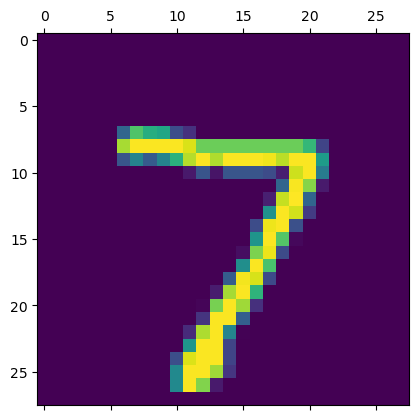

In [41]:
#lets predict the first data on test set

#reload the data that has not been flattened
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() 
plt.matshow(x_test[0])

In [42]:
#print the predictions for the first data on test set

y_pred[0]

array([9.5702626e-04, 5.8810932e-05, 8.3878217e-04, 2.7268135e-03,
       1.3670289e-04, 1.9243240e-04, 1.5970172e-05, 9.8738539e-01,
       1.7171371e-04, 7.5163757e-03], dtype=float32)

In [43]:
#argmax function finds the argument that gives the maximum value from a target function.

np.argmax(y_pred[0])

7

## Confusion Matrix

In [44]:
#confusion matrix

y_pred_labels = [np.argmax(i) for i in y_pred]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    7,    8,    1,    2,    0],
       [   0, 1109,    2,    2,    1,    3,    4,    1,   13,    0],
       [  10,    4,  915,   12,   18,    1,   16,   16,   33,    7],
       [   3,    1,   20,  917,    1,   26,    3,   15,   18,    6],
       [   1,    5,    5,    2,  911,    1,   11,    2,    4,   40],
       [  11,    4,    9,   44,   12,  761,   15,    4,   25,    7],
       [  15,    3,    7,    0,   13,   17,  898,    1,    4,    0],
       [   5,   13,   27,    4,    9,    0,    0,  941,    3,   26],
       [   9,   10,   10,   26,   11,   23,   17,   12,  842,   14],
       [  15,    9,    5,   13,   43,    7,    0,   14,    4,  899]])>

Text(95.72222222222221, 0.5, 'Truth')

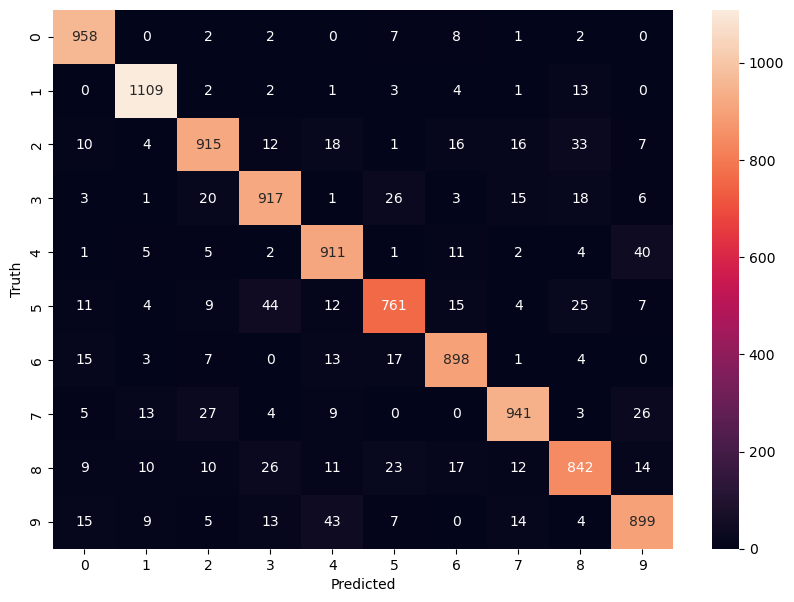

In [45]:
#plot confusion matrix with seaborn heatmap

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')